[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/GNNs/blob/main/gnns.ipynb)

# Graph Neural Netwroks: An Overview and Demonstration

Author: Roy Forestano \\
Date: 6 December 2022

**Inspiration and References:**
    
1. https://blog.tensorflow.org/2021/11/introducing-tensorflow-gnn.html (tensorflow_gnn tutorial)
2. https://github.com/tensorflow/gnn/tree/main/examples/tutorials/neurips_2022 (tensorflow_gnn tutorial)
3. https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html (Pytorch GNN model)
4. https://www.youtube.com/watch?v=8owQBFAHw7E (diagrams, ground-up solution)

**Demo on a relevant example (2022 Qatar World Cup) using PyTorch Geometric for GNNs:** Using Passing Data to Classify Soccer (Football) Player Positions on the Pitch

5. Inspiration to apply GNNs to player data: https://towardsdatascience.com/predicting-the-fifa-world-cup-2022-with-a-simple-model-using-python-6b34bdd4f2a5
6. Demo and Code: https://paulminogue.com/posts/375ea85d-fc58-4c13-a9dc-5a45ba3c368f (for cleaned data)

## Install necessary libraries and mount your drive if running in colab

In [3]:
#!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
#!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
#!pip install torch-geometric

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## An Introduction to Graph Neural Networks (GNNs)

Many patterns in nature can be described using graph structures including

1. Molecules:


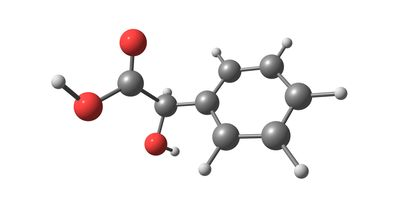

2. Social Networks

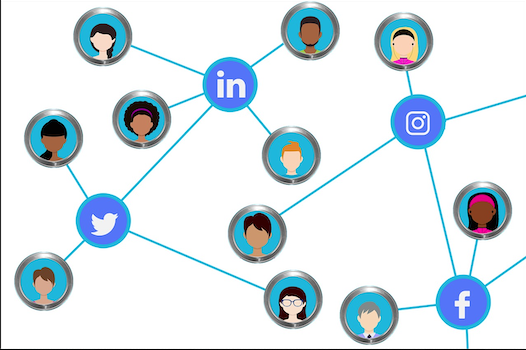

3. Maps

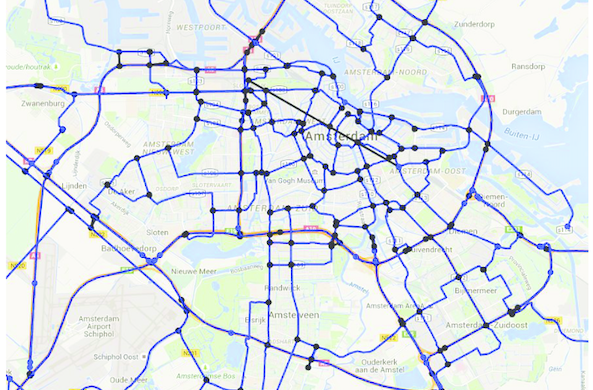

4. The Brain

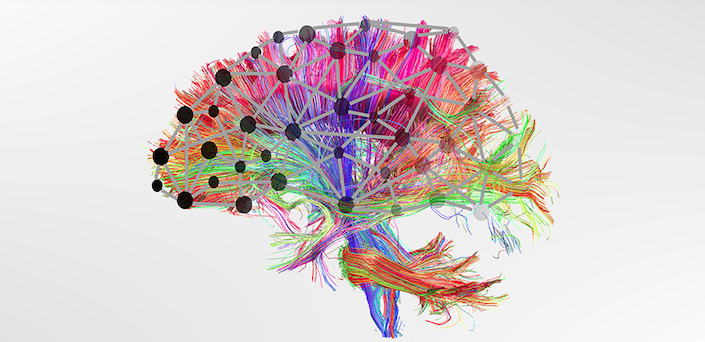

**1. Molecules (nodes: atoms, edges: bonds):** Predicting how potent a drug is 

**2. Social networks (nodes: people,edges: connections): **bold text** Predicting preferences among users

**3. Maps (nodes: intersections, edges: roads):** Predicting traffic flow around an intersection

**4. Brain (nodes: neurons,edges: axons)**: Predicting brain response during an activity

---

**Graph neural networks (GNNs)** are typically thought of as generalizations to convolutional neural networks (CNNs), which are typically used for image recognition, pattern recognition, and computer vision because, whereas in an image, each pixel is connected to its nearest neighboring pixels, we would ideally like to be able to classify any arbitrary graph structure.

**What we would like to see in a GNN:** 

1. Be able to update nodes based off of neighboring node features with weights to specify the importance of different neighboring nodes.

$$\vec{h'_i} = f(\{ \vec{h}_{neighbors} \})$$

2. Fixed number of paramters (independent of input size). E.g. if I increase my graph size, I should be able to apply the same model to make predicitons. 
3. Localization property to be able to act only on a local neighborhood of a node.
4. Robustness (reliability) to generalizations of new graph structures.

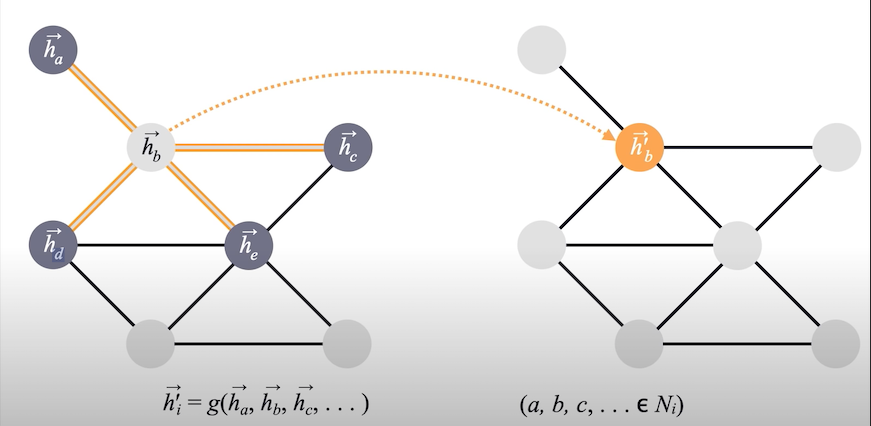

**Set-Up and Use Cases:**

1. Take inputs $\vec{x}$ with adjacencies $\hat{A}$.
2. Send nodes to a latent space with newly constrcuted features $\vec{q}$ and the original corresponding adjacencies $\hat{A}$.
3. **What to predict:** Node Classification: apply a shared layer $f$ to each $\vec{h}$ to classify nodes.

$$\vec{C}_i = f \left(\vec{h}_i \right)$$

Graph Classification:  

$$\vec{C}_G = f\left(\sum_i \vec{h}_i \right)$$

Link Classsification (or Existence):

$$\vec{C}_{ij} = f(\vec{h}_i, \vec{h}_j, \vec{e}_{ij})$$

where $\vec{e}_{ij}$ is the edge connecting nodes $\vec{h}_i, \vec{h}_j$.


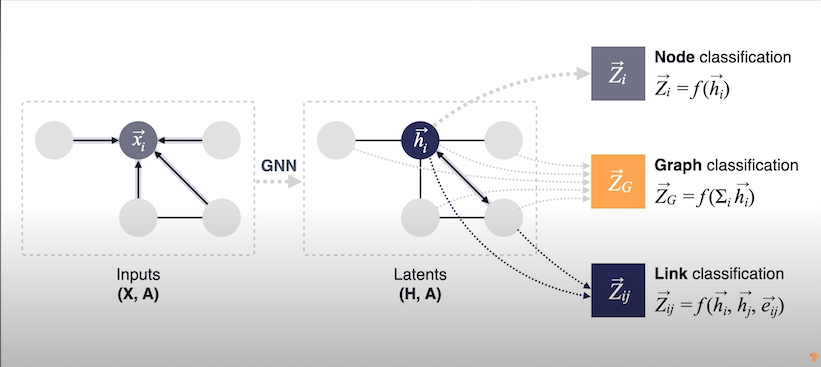

-----

**We will focus on NODE classification from here on.** 

Assuming we have an unweighted and undirected graph, we can define an adjacency matrix as
 
$$A_{ij} = \begin{cases}  1 & \text{if } i\longleftrightarrow j \\
0 & \text{otherwise}
\end{cases}$$

We also require every node to be connected to itself, thus,

$$\tilde{\bf A} = {\bf A} + {\bf I}_{dim(A)}$$

Collect neighborhoods by taking the product with the adjacency matrix (this will collect all neighboring nodes)

$${\bf H}' = \sigma (\tilde{\bf A}{\bf W} {\bf H})$$

where ${\bf W}$ is a learnable node-wise shared linear transformation and $\sigma$ is a non-linear function, such as ReLU.

The simplest properly normalized update rule for each node is called the '**Mean Pooling Rule**' and can be written as

$$\vec{h}_i' =  \sigma \left( \sum_{j \in N_i} \frac{1}{N_i} {\bf W} \vec{h}_j \right) $$

where $N_i$ is the number of neighbors about node $\vec{h}_i$.

The most popular **graph convolutional network (GCN)** update rule (more general) is

$$\vec{h}_i' =  \sigma \left( \sum_{j \in N_i} \frac{1}{\sqrt{|N_i||N_j|}} {\bf W} \vec{h}_j \right) $$

from a paper by Kipf and Welling entitled Semi-Supervised Classification with Graph Convolutional Networks (Kipf & Welling, ICLR 2017) https://tkipf.github.io/graph-convolutional-networks/ . A more general update function which incorporates edge messages between nodes and aggregates them together is called a **message passing neural network (MPNN)** (Gilmer et al., ICML 2017) https://arxiv.org/abs/1704.01212 ,

$$\vec{h}'_i = f_\nu \left( \vec{h}_i \sum_{j \in N_i} \vec{m}_{ji} \right)$$

where $f_\nu$ is some readout function and $\vec{m}_{ij} = f_e(\vec{h}_i,\vec{h}_j,\vec{e}_{ij})$ is the message function. However, it is important to note that with the messages, more storage is required, and thus, this method works best with small graphs. To get around this, researchers changed back the $f_\nu \to \sigma$, and changed to a more general coefficient $m_{ij} \to \alpha_{ij}$, creating **graph attention networks (GAT)** which incorporate the use of a learnable, shared, self-attention layer, e.g. a transformer (Velickovic et al., ICLR 2018). https://arxiv.org/abs/1609.02907


It turns out that, transformers are Graph Neural Netwroks: (left are GNN, right are Transformer features)

1. Both are fully-connected graphs
2. Message function $\equiv$ sender node features
3. Aggregation $\equiv$ Attention

i.e. they can be mapped into one another (Joshi, The Gradient 2020). https://thegradient.pub/transformers-are-graph-neural-networks/


## Demonstration: Analyzing the Cora (Paper) Dataset with a GNN 

In [5]:
!pip install tensorflow
!pip install spektral
!pip install tensorflow_gnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 457 kB 5.1 MB/s 
     |████████████████████████████████| 14.5 MB 53.7 MB/s 
     |████████████████████████████████| 151 kB 62.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 278 kB 59.6 MB/s 
     |████████████████████████████████| 526 kB 55.8 MB/s 
     |████████████████████████████████| 2.7 MB 40.3 MB/s 
     |████████████████████████████████| 2.5 MB 31.8 MB/s 
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=53068dbd7f4d309d39e7674b2fb84079904bb85b95e2e87737e45741dd9bd6be
  Stored in directory: /root/.cache/

Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import spektral
import tensorflow_gnn as tfgnn
import functools
import collections
from typing import Mapping, List
import functools
import math
import os
import networkx as nx
import pandas as pd

In [7]:
edges = pd.read_csv(os.path.join('/content/drive/MyDrive/UF_Courses/2022_fall/2022_fall_ml/final/data/cora/cora.cites'), sep='\t', header=None, names=["target", "source"]) 
edges["label"] = "cites"

In [8]:
#edges.sample(frac=1).head(5)

In [9]:
#Gnx = nx.from_pandas_edges(edges, edge_attr="label")
#nx.set_node_attributes(Gnx, "paper", "label")

In [10]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names =  feature_names + ["subject"]
node_data = pd.read_csv(os.path.join('/content/drive/MyDrive/UF_Courses/2022_fall/2022_fall_ml/final/data/cora/cora.content'), sep='\t', header=None, names=column_names)

In [11]:
node_data.head()

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [12]:
unique_features = np.unique(node_data['subject'])

In [13]:
for i,name in enumerate(unique_features):
  print('Label '+str(i)+': ',name)

Label 0:  Case_Based
Label 1:  Genetic_Algorithms
Label 2:  Neural_Networks
Label 3:  Probabilistic_Methods
Label 4:  Reinforcement_Learning
Label 5:  Rule_Learning
Label 6:  Theory


Import Data frpm Spektral

In [14]:
dataset = spektral.datasets.citation.Citation(name='cora')
test_mask = dataset.mask_te # boolean
train_mask = dataset.mask_tr # boolean
val_mask = dataset.mask_va # boolean
graph = dataset.graphs[0]  # desciption
features = graph.x # word present or not
adj = graph.a  # tells us adjacency value for each node
labels = graph.y  # tells us which paper topic each node should be classified as

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [15]:
# Require each node to be connected to itself
adj = adj + np.eye(adj.shape[0])
features = features.astype('float32')
adj = adj.astype('float32')

In [16]:
features.shape

(2708, 1433)

In [17]:
adj.shape

(2708, 2708)

In [18]:
labels.shape

(2708, 7)

In [19]:
graph

Graph(n_nodes=2708, n_node_features=1433, n_edge_features=None, n_labels=7)

In [20]:
print('Training Nodes: ', np.sum(train_mask))

Training Nodes:  140


In [21]:
print('Validation Nodes: ',np.sum(val_mask))

Validation Nodes:  500


In [22]:
print('Test Nodes: ',np.sum(test_mask))

Test Nodes:  1000


Define Relevant Functions

In [23]:
# logits = probability outputs for each possible paper category
def masked_softmax_cross_entropy(logits,labels,mask):
  loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels) # get cross entropy loss
  mask = tf.cast(mask,dtype = tf.float32)  # change boolean to float
  mask /= tf.reduce_mean(mask) # to take product with loss
  loss *= mask
  return tf.reduce_mean(loss)

def masked_accuracy(logits,labels,mask):
  accurate_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(labels,1)) # accuracy boolean
  accuracy_all = tf.cast(accurate_prediction,tf.float32) # change accuracy boolean to float
  mask = tf.cast(mask, dtype = tf.float32) # change boolean to float
  mask /= tf.reduce_mean(mask) # to take product with loss
  accuracy_all *= mask
  return tf.reduce_mean(accuracy_all)

def gnn(features, adj, transform,activation):
  # Transform nodes individually
  seq_features = transform(features) # W tensor from theoretical introduction above
  get_features =  tf.matmul(adj,seq_features) # Multiply with adjacency matrix to connect neighborhoods
  return activation(get_features)  # apply activation function

def train(features,adj,gnn_model_fn,latent_dimensions,epochs,learn_rate):
  layer1 = tf.keras.layers.Dense(latent_dimensions)
  layer2 = tf.keras.layers.Dense(latent_dimensions)
  layer3 = tf.keras.layers.Dense(latent_dimensions)
  layer4 = tf.keras.layers.Dense(7)
  
  def specific_gnn(features,adj):
    hidden1 = gnn_model_fn(features,adj,layer1,tf.nn.relu)
    hidden2 = gnn_model_fn(hidden1,adj,layer2,tf.nn.relu)
    hidden3 = gnn_model_fn(hidden2,adj,layer3,tf.nn.relu)
    logits  = gnn_model_fn(hidden3,adj,layer4,tf.identity)
    return logits

  optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)

  best_accuracy = 0.0
  epochs_array = np.empty([])
  training_loss = np.array([])
  valid_acc = np.array([])
  for e in range(epochs+1):
    with tf.GradientTape() as tape:
      logits = specific_gnn(features,adj)
      loss = masked_softmax_cross_entropy(logits,labels,train_mask)
    
    variables = tape.watched_variables()
    gradients = tape.gradient(loss,variables)
    optimizer.apply_gradients(zip(gradients,variables))

    logits = specific_gnn(features,adj)
    val_accuracy = masked_accuracy(logits,labels,val_mask)
    test_accuracy = masked_accuracy(logits,labels,test_mask)

    epochs_array = np.hstack([ epochs_array, np.array([int(e)]) ])
    training_loss = np.hstack([training_loss, np.array([loss.numpy()]) ])
    valid_acc = np.hstack([valid_acc, np.array([val_accuracy.numpy()]) ])

    if val_accuracy > best_accuracy:
      best_accuracy = val_accuracy
      print('Epoch',e,'| Training Loss: ',loss.numpy(),'| Validation Accuracy: ',val_accuracy.numpy(),'| Test Accuracy: ',test_accuracy.numpy())
  return logits, epochs_array, training_loss, valid_acc

---
1. layer1 = Dense: 32

Activation = ReLU

2. layer2 = Dense: 32

Activation = ReLU

3. layer3 = Dense: 32

Activation = ReLU

4. layer4 = Dense: 7

Activation = Identity

---

In [24]:
# Standard Network passing the raw adjacency matrix
latent_dim = 32
epochsN = 220
learning = 0.01
predictions, epochs, training_loss, valid_accur = train(features,adj,gnn,latent_dim,epochsN,learning)

Epoch 0 | Training Loss:  460.4279 | Validation Accuracy:  0.33399996 | Test Accuracy:  0.32899997
Epoch 3 | Training Loss:  159.91678 | Validation Accuracy:  0.48599997 | Test Accuracy:  0.47299996
Epoch 12 | Training Loss:  24.737482 | Validation Accuracy:  0.516 | Test Accuracy:  0.54599994
Epoch 13 | Training Loss:  22.492664 | Validation Accuracy:  0.51799995 | Test Accuracy:  0.523
Epoch 167 | Training Loss:  0.7039803 | Validation Accuracy:  0.536 | Test Accuracy:  0.559
Epoch 173 | Training Loss:  0.6942512 | Validation Accuracy:  0.538 | Test Accuracy:  0.55799997
Epoch 185 | Training Loss:  0.67680854 | Validation Accuracy:  0.53999996 | Test Accuracy:  0.55399996
Epoch 186 | Training Loss:  0.6755146 | Validation Accuracy:  0.542 | Test Accuracy:  0.556
Epoch 188 | Training Loss:  0.6731286 | Validation Accuracy:  0.54399997 | Test Accuracy:  0.556
Epoch 199 | Training Loss:  0.6609487 | Validation Accuracy:  0.546 | Test Accuracy:  0.55099994
Epoch 201 | Training Loss:  0.6

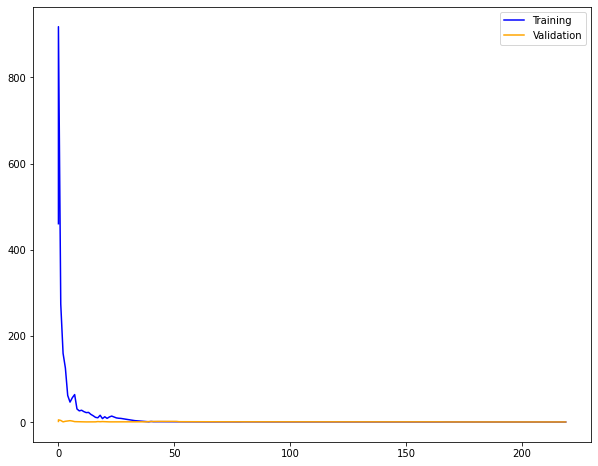

In [25]:
plt.figure(figsize=(10,8))
plt.plot(epochs[:221],training_loss[:221],c='b',label='Training')
plt.plot(epochs[:221],1/valid_accur[:221]-1,c='orange',label='Validation')
plt.legend()
plt.show()

In [26]:
labels[test_mask].shape

(1000, 7)

In [27]:
predictions.shape

TensorShape([2708, 7])

In [28]:
predictions[test_mask].shape

TensorShape([1000, 7])

In [29]:
N=20
print('Test true: ',np.argmax(labels[test_mask][:N],axis=1))
print('Pred: ',np.argmax(predictions[test_mask][:N],axis=1))
print('Pred == True: ',np.argmax(labels[test_mask][:N],axis=1)==np.argmax(predictions[test_mask][:N],axis=1))

Test true:  [3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Pred:  [2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Pred == True:  [False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [30]:
# Normalize adjacencies with the mean pooling rule
count_neighbors = tf.reduce_sum(adj,axis=-1)
predictions, epochs, training_loss, valid_accur = train(features,adj/count_neighbors,gnn,latent_dim,epochsN,learning)

Epoch 0 | Training Loss:  1.9422948 | Validation Accuracy:  0.17599998 | Test Accuracy:  0.19000001
Epoch 1 | Training Loss:  1.88115 | Validation Accuracy:  0.252 | Test Accuracy:  0.25899997
Epoch 2 | Training Loss:  1.7797029 | Validation Accuracy:  0.34799996 | Test Accuracy:  0.355
Epoch 3 | Training Loss:  1.6366765 | Validation Accuracy:  0.48799998 | Test Accuracy:  0.50999993
Epoch 4 | Training Loss:  1.4589499 | Validation Accuracy:  0.666 | Test Accuracy:  0.67199993
Epoch 5 | Training Loss:  1.2531079 | Validation Accuracy:  0.69200003 | Test Accuracy:  0.716
Epoch 6 | Training Loss:  1.0283302 | Validation Accuracy:  0.71 | Test Accuracy:  0.73399997
Epoch 7 | Training Loss:  0.7994583 | Validation Accuracy:  0.73999995 | Test Accuracy:  0.755
Epoch 8 | Training Loss:  0.5913828 | Validation Accuracy:  0.766 | Test Accuracy:  0.77400005
Epoch 15 | Training Loss:  0.044189606 | Validation Accuracy:  0.77 | Test Accuracy:  0.7859999
Epoch 22 | Training Loss:  0.032976724 | V

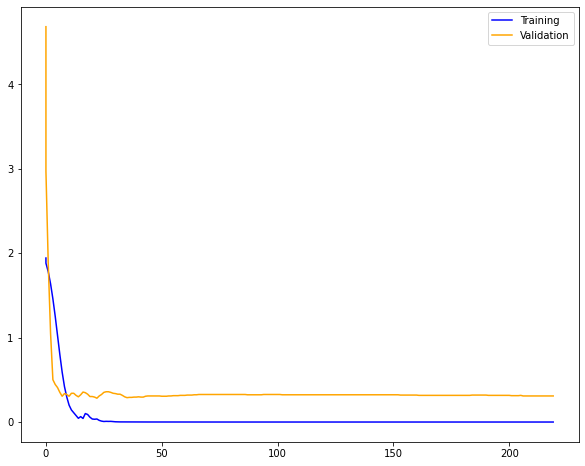

In [31]:
plt.figure(figsize=(10,8))
plt.plot(epochs[:221],training_loss[:221],c='b',label='Training')
plt.plot(epochs[:221],1/valid_accur[:221]-1,c='orange',label='Validation')
plt.legend()
plt.show()

In [32]:
N=20
print('Test true: ',np.argmax(labels[test_mask][:N],axis=1))
print('Pred: ',np.argmax(predictions[test_mask][:N],axis=1))
print('Pred == True: ',np.argmax(labels[test_mask][:N],axis=1)==np.argmax(predictions[test_mask][:N],axis=1))

Test true:  [3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Pred:  [1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Pred == True:  [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [33]:
# Normalize with Kipf's method
normalize_diag = tf.linalg.diag(1.0/tf.sqrt(count_neighbors))
double_norm_adj = tf.matmul(normalize_diag,tf.matmul(adj,normalize_diag))
predictions, epochs, training_loss, valid_accur = train(features,double_norm_adj,gnn,latent_dim,epochsN,learning)

Epoch 0 | Training Loss:  1.9507617 | Validation Accuracy:  0.26 | Test Accuracy:  0.265
Epoch 1 | Training Loss:  1.9147788 | Validation Accuracy:  0.408 | Test Accuracy:  0.39999998
Epoch 4 | Training Loss:  1.5499754 | Validation Accuracy:  0.444 | Test Accuracy:  0.45699996
Epoch 5 | Training Loss:  1.3438296 | Validation Accuracy:  0.48 | Test Accuracy:  0.48699996
Epoch 6 | Training Loss:  1.1235801 | Validation Accuracy:  0.532 | Test Accuracy:  0.536
Epoch 7 | Training Loss:  0.90544474 | Validation Accuracy:  0.656 | Test Accuracy:  0.659
Epoch 8 | Training Loss:  0.69358766 | Validation Accuracy:  0.76199996 | Test Accuracy:  0.755
Epoch 9 | Training Loss:  0.5055711 | Validation Accuracy:  0.76399994 | Test Accuracy:  0.785
Epoch 10 | Training Loss:  0.3530864 | Validation Accuracy:  0.78 | Test Accuracy:  0.79499996
Epoch 11 | Training Loss:  0.24513982 | Validation Accuracy:  0.78800005 | Test Accuracy:  0.79599994


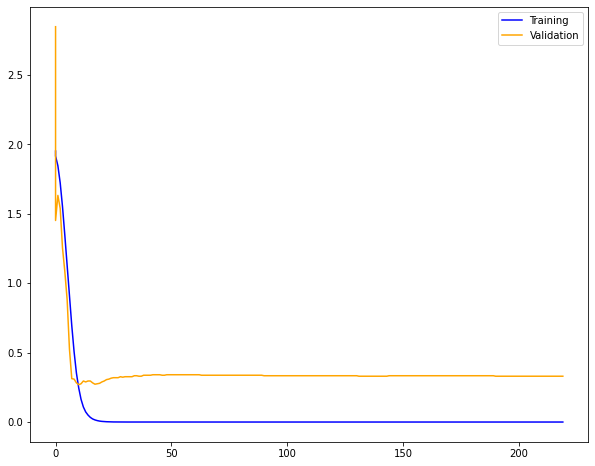

In [34]:
plt.figure(figsize=(10,8))
plt.plot(epochs[:221],training_loss[:221],c='b',label='Training')
plt.plot(epochs[:221],1/valid_accur[:221]-1,c='orange',label='Validation')
plt.legend()
plt.show()

In [35]:
N=20
print('Test true: ',np.argmax(labels[test_mask][:N],axis=1))
print('Pred: ',np.argmax(predictions[test_mask][:N],axis=1))
print('Pred == True: ',np.argmax(labels[test_mask][:N],axis=1)==np.argmax(predictions[test_mask][:N],axis=1))

Test true:  [3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Pred:  [1 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 1 2]
Pred == True:  [False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True]


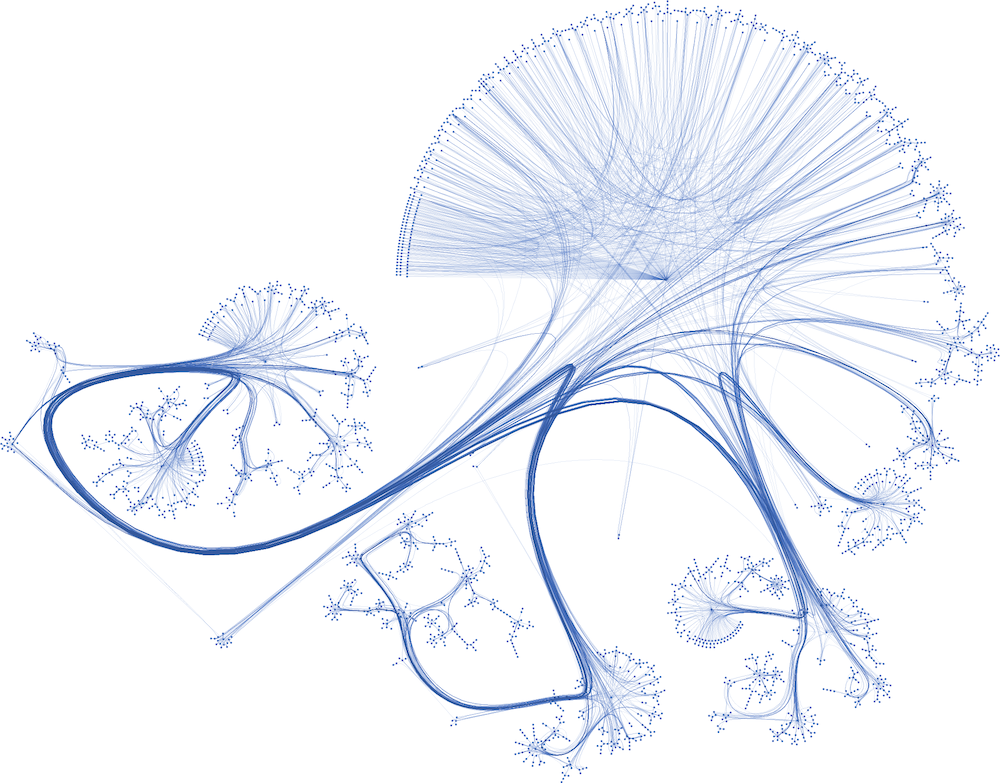

1. Plot Above: https://graphsandnetworks.com/the-cora-dataset/
2. yEd live Software to generate this plot: https://www.yworks.com/yed-live/